# Neural Networks

## XNOR

In [1]:
import numpy as np
from si.data.Dataset import Dataset

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1], [0], [0], [1]])
dataset = Dataset(X, y, ['X1', 'X2'], 'X1 XNOR X2')

In [3]:
dataset.toDataFrame()

,X1,X2,X1 XNOR X2
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [4]:
from si.supervised.NeuralNetwork import NN, Dense, Activation
from si.util.Metrics import cross_entropy, cross_entropy_prime
from si.util.Activation import Sigmoid

In [5]:
# layer1 weights
w1 = np.array([[20, -20], [20, -20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.setWeights(w1, b1)

In [6]:
# layer2 weights
w2 = np.array([[20], [20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.setWeights(w2, b2)

In [7]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Activation(Sigmoid()))
nn.add(l2)
nn.add(Activation(Sigmoid()))
# pass the info that the model is fitted
nn.is_fitted = True

In [8]:
np.round(nn.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [9]:
nn.cost(dataset.X, dataset.y)

0.49995454232489767

## Train the model using backpropagation

In [10]:
nn2 = NN(epochs = 100000, lr = 0.1, verbose = False)
nn2.add(Dense(2, 2))
nn2.add(Activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(Activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [11]:
nn2.fit(dataset)
nn2.is_fitted = True #Ele faz o fit, mas não o altera para *True*, por isso foi forçado aqui

epoch 1588 / 100000, error = 0.24980968461712244

epoch 1942 / 100000, error = 0.24953408044884057

epoch 2309 / 100000, error = 0.2491695533603538

epoch 2669 / 100000, error = 0.24867298467923152

epoch 3023 / 100000, error = 0.24796206978568794

epoch 3356 / 100000, error = 0.24697641402244735

epoch 4148 / 100000, error = 0.24239540705280674

epoch 4501 / 100000, error = 0.2387100110319459

epoch 4855 / 100000, error = 0.2335297099572181

epoch 5166 / 100000, error = 0.22754159848970734

epoch 5497 / 100000, error = 0.2197067700273851

epoch 5816 / 100000, error = 0.21110551010506146

epoch 6156 / 100000, error = 0.20154298852605354

epoch 6868 / 100000, error = 0.1831052266695024

epoch 7261 / 100000, error = 0.17445184517039453

In [12]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [13]:
import matplotlib.pyplot as plt

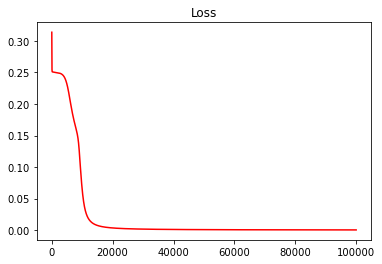

In [14]:
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color = 'red')
plt.title('Loss')
plt.show()

In [15]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [16]:
nn2.cost(dataset.X,dataset.y)

0.4824311117302022